In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# here we are working on Tensorflow version 2.1.0 so we need to write tensorflow.keras.
#keras is in built function in Tensorflow.
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [3]:

train_location = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"
#test_location = "/content/drive/MyDrive/Colab Notebooks/test_dataset"
test_location = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"
filepath = '/content/drive/MyDrive/Colab Notebooks/fake currency/Model2/model1_vgg16.keras'

In [4]:
from tensorflow.keras.models import load_model
Detection=load_model(filepath)

In [5]:
img_size=224
batch_size=48
num_class=12

In [6]:
# Complete Dataset images can be loaded using ImageDataGenerator function

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(train_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory(test_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)


Found 2748 images belonging to 12 classes.
Found 2748 images belonging to 12 classes.


In [7]:
classes2=train_generator.class_indices
classes2

{'1Hundredfake': 0,
 '1Hundrednote': 1,
 '2Hundrednote': 2,
 '5Hundrednote': 3,
 'Fiftynote': 4,
 'Tennote': 5,
 'Twentynote': 6,
 'fake_10': 7,
 'fake_20': 8,
 'fake_200': 9,
 'fake_50': 10,
 'fake_500': 11}

In [8]:
classes=validation_generator.class_indices
classes

{'1Hundredfake': 0,
 '1Hundrednote': 1,
 '2Hundrednote': 2,
 '5Hundrednote': 3,
 'Fiftynote': 4,
 'Tennote': 5,
 'Twentynote': 6,
 'fake_10': 7,
 'fake_20': 8,
 'fake_200': 9,
 'fake_50': 10,
 'fake_500': 11}

In [9]:
if classes2==classes:
  print('True')

True


In [10]:
category=[]
for i in classes:
          category.append(i)

category

['1Hundredfake',
 '1Hundrednote',
 '2Hundrednote',
 '5Hundrednote',
 'Fiftynote',
 'Tennote',
 'Twentynote',
 'fake_10',
 'fake_20',
 'fake_200',
 'fake_50',
 'fake_500']

In [11]:
# Import necessary libraries
from skimage import io  # For image input/output operations (not used in this code)
import os  # For handling file and directory operations
from tensorflow.keras.preprocessing import image  # For image loading and preprocessing
import numpy as np  # For numerical operations

# Define the test dataset directory
image_directory = test_location  # Path where test images are stored

# Initialize lists to store labels and predictions
dataset = []  # (Unused in this code)
predict_result = []  # Stores predicted class labels
label = []  # Stores actual class labels
count = 0  # Counter for processed images

# Get all class folders inside the test dataset directory
my_folders = os.listdir(image_directory)

# Loop through each folder (each representing a class)
for i, folder_name in enumerate(my_folders):
    # print(str(i)+': ' +folder_name)  # Uncomment for debugging

    # Initialize label assignment
    loc = 0  # Class index tracker
    for j in category:  # Assuming 'category' is a list of class names
        if j == folder_name:
            lab = loc  # Assign numeric label based on folder name
        loc += 1

    # Retrieve all image filenames inside the current folder
    my_images = os.listdir(image_directory + '/' + folder_name)

    # Loop through each image in the folder
    for j, image_name in enumerate(my_images):
        # print(str(j)+': ' +image_name)  # Uncomment for debugging

        # Construct the full file path of the image
        file_name = image_directory + '/' + folder_name + '/' + image_name

        # Load the image and resize it to the required input size
        test_img = image.load_img(file_name, target_size=(img_size, img_size))

        # Convert the image into an array
        test_img = image.img_to_array(test_img)

        # Expand dimensions to match the model's expected input shape
        test_img = np.expand_dims(test_img, axis=0)

        # Predict the class of the image using the trained model
        result = Detection.predict(test_img)

        # Increment the image count
        count += 1

        # Store the actual and predicted class labels
        label.append(lab)  # Append actual class label
        predict_result.append(result.argmax())  # Append predicted class (index of highest probability)

        # Print the filename, actual class, and predicted class
        print(f'{image_name} : {folder_name} : {str(lab)} , Predicted : {result.argmax()} count {count} ')




Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
IMG_1667851997371.jpg : Fiftynote : 4 , Predicted : 6 count 249 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
IMG_1667851958373.jpg : Fiftynote : 4 , Predicted : 4 count 250 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
IMG_1667852224948.jpg : Fiftynote : 4 , Predicted : 8 count 251 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
IMG_1667852242769.jpg : Fiftynote : 4 , Predicted : 4 count 252 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
IMG_1667852071391.jpg : Fiftynote : 4 , Predicted : 5 count 253 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
IMG_1667852144655.jpg : Fiftynote : 4 , Predicted : 5 count 254 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
IMG_1667852103613.jpg : Fiftynote : 4 , Predicted : 4 count 255 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
IMG_1667851992305.jpg : Fiftynote : 4 , Predicted : 1 count 256 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
IMG_1667852023512.jpg : Fiftynote : 4 , Predicted : 4 count 257 
1/1 ━━━━━━━━━

In [12]:
correct=0
Wrong=0


for i in range(len(label)):
  if(predict_result[i]==label[i]):
    correct+=1
  else:
    Wrong+=1

print(f'correct: {correct} , Wrong: {Wrong}')




correct: 1350 , Wrong: 1398


In [13]:
Acc= correct/(correct+Wrong)
Acc*100

49.12663755458515

In [14]:

y_test = label
y_pred = predict_result

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn import metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))

[[ 65   7   0   0  10   1   0   5   6   0   0   0]
 [ 36 147   6   5  16   6   4   3   2   9   0   2]
 [ 25 103  42  17  36   1   2   7   2  32   0   5]
 [  6   5   0 191  13   1   5   2   1   0   0  21]
 [ 24  21   0  13 378  38  19  20  11   1   0   3]
 [ 65  73   1  25 234 195  39  39  10   0   2   4]
 [ 33  30   1   9  99  15 125   4   4   0   0   2]
 [ 12   8   0   0  28   1   1  29   6   0   0   3]
 [  8   6   0   2  11   1   1   1  32   0   1   0]
 [ 23   4   3   2   1   0   0   0   1  38   0   1]
 [  0   2   0   4   3   0   0   6  17   0  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0  90]]
              precision    recall  f1-score   support

           0       0.22      0.69      0.33        94
           1       0.36      0.62      0.46       236
           2       0.79      0.15      0.26       272
           3       0.71      0.78      0.74       245
           4       0.46      0.72      0.56       528
           5       0.75      0.28      0.41       687
        

In [16]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([ 65,   7,   0,   0,  10,   1,   0,   5,   6,   0,   0,   0,  36,
       147,   6,   5,  16,   6,   4,   3,   2,   9,   0,   2,  25, 103,
        42,  17,  36,   1,   2,   7,   2,  32,   0,   5,   6,   5,   0,
       191,  13,   1,   5,   2,   1,   0,   0,  21,  24,  21,   0,  13,
       378,  38,  19,  20,  11,   1,   0,   3,  65,  73,   1,  25, 234,
       195,  39,  39,  10,   0,   2,   4,  33,  30,   1,   9,  99,  15,
       125,   4,   4,   0,   0,   2,  12,   8,   0,   0,  28,   1,   1,
        29,   6,   0,   0,   3,   8,   6,   0,   2,  11,   1,   1,   1,
        32,   0,   1,   0,  23,   4,   3,   2,   1,   0,   0,   0,   1,
        38,   0,   1,   0,   2,   0,   4,   3,   0,   0,   6,  17,   0,
        18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        90])

In [17]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
accuracy

49.12663755458515

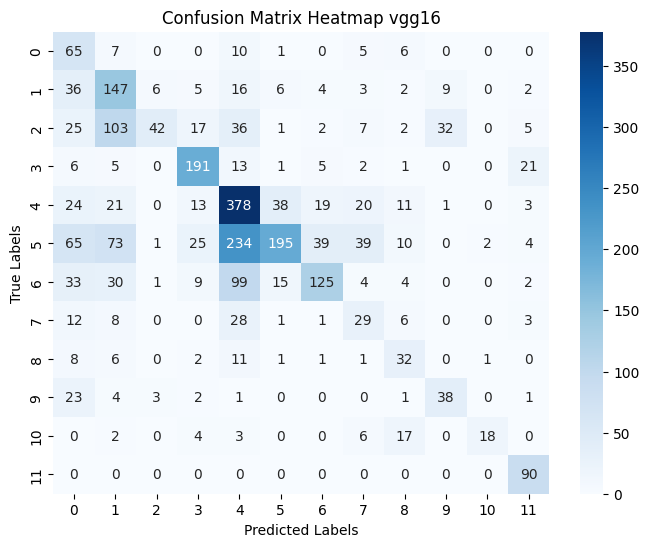

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Heatmap vgg16")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()